<a href="https://colab.research.google.com/github/Pranali-25/LABS/blob/main/Module%209%20Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 9: Neural Networks
## Lab 1: Introduction to Multi-Layer Perceptron (MLP)
#### Module Coordinator: Shantanu Agrawal




Epoch: 0, Loss: 0.1938803791999817, 
Epoch: 500, Loss: 0.2750614285469055, 
Epoch: 1000, Loss: 0.26062139868736267, 
Epoch: 1500, Loss: 0.156051903963089, 
Epoch: 2000, Loss: 0.2027246654033661, 
Epoch: 2500, Loss: 0.28546977043151855, 
Epoch: 3000, Loss: 0.162941113114357, 
Epoch: 3500, Loss: 0.2275097519159317, 
Epoch: 4000, Loss: 0.09929902851581573, 
Epoch: 4500, Loss: 0.159388467669487, 
tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [1.]
tensor([1., 1.]) [0.]


<ipython-input-1-f6fc6688bc78>:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-1-f6fc6688bc78>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


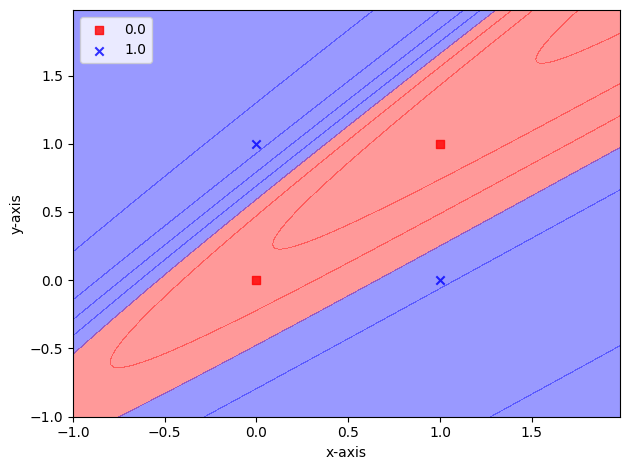

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)


# Use a mean square error loss
loss_func = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



### Exercises

1.  Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.
--------------------------------------------------------------------------------
2.  Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?
ANSWER: In the case of SLP, the decision boundary will be a line passing through the origin with a slope of 1. However, in the case of MLP, the decision boundary can be a non-linear curve.


--------------------------------------------------------------------------------
3. Try removing the activation function from the MLP and rerun the code. What happens in this case?
**ANSWER:**
If we remove the activation function from the MLP, the model will not be able to learn the non-linear decision boundary. The decision boundary will be a linear hyperplane, which will not be able to classify the non-linear data correctly.
  - Can you tell why particular activation function can be used in the model architecture?



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Loss (AND): 0.09071460366249084, Loss (-1/+1): 2.4652950763702393
Epoch: 500, Loss (AND): 0.02166036143898964, Loss (-1/+1): 1.066899299621582
Epoch: 1000, Loss (AND): 0.04378644749522209, Loss (-1/+1): 1.0079067945480347
Epoch: 1500, Loss (AND): 0.007160548120737076, Loss (-1/+1): 0.999139130115509
Epoch: 2000, Loss (AND): 0.004250215366482735, Loss (-1/+1): 0.9993323087692261
Epoch: 2500, Loss (AND): 0.0023594119120389223, Loss (-1/+1): 0.003866253886371851
Epoch: 3000, Loss (AND): 0.0021896695252507925, Loss (-1/+1): 0.9995258450508118
Epoch: 3500, Loss (AND): 6.839646630396601e-06, Loss (-1/+1): 1.0015159845352173
Epoch: 4000, Loss (AND): 0.000903529638890177, Loss (-1/+1): 0.0019630040042102337
Epoch: 4500, Loss (AND): 3.847753305308288e-06, Loss (-1/+1): 1.0011848211288452
AND:  tensor([0., 0.]) 0.0
AND:  tensor([0., 1.]) 0.0
AND:  tensor([1., 0.]) 0.0
AND:  tensor([1., 1.]) 1.0
(-1/+1):  tensor([-1., -1.]) 0.0
(-1/+1):  tensor([-1.,  1.]) 0.0
(-1/+1):  tensor([ 1., -1.

<ipython-input-4-b72fe023e86b>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


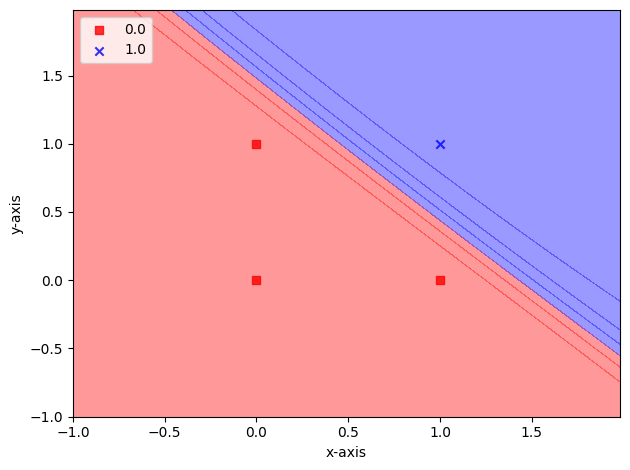

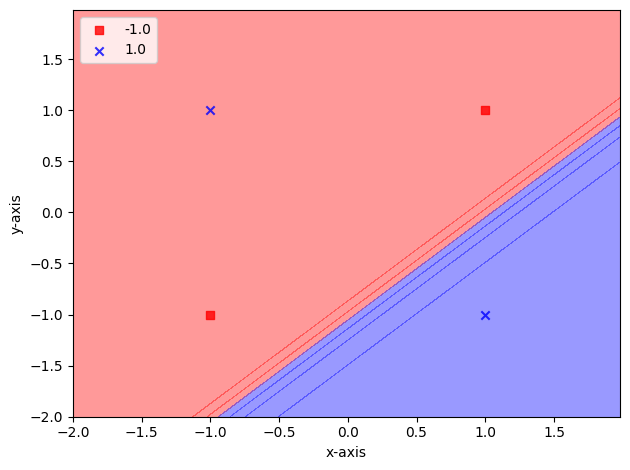

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float).T
        Z = np.array([])
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.detach().numpy())) if Z.size else out.detach().numpy()
    else:
        print('Not implemented')
        return

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', alpha=1.0,
                    linewidths=1, marker='o',
                    s=55, label='test set')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

torch.manual_seed(0)

# Condition 1: AND gate
X_AND = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
Y_AND = torch.tensor([0, 0, 0, 1], dtype=torch.float)

# Condition 2: -1/+1 logic
X_11 = torch.tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]], dtype=torch.float)
Y_11 = torch.tensor([-1, 1, 1, -1], dtype=torch.float)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

class Net_no_act(nn.Module):
    def __init__(self):
        super(Net_no_act, self).__init__()
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model_AND = Net()
model_11 = Net()

def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 1)

weights_init(model_AND)
weights_init(model_11)

loss_func = nn.MSELoss()

optimizer_AND = optim.SGD(model_AND.parameters(), lr=0.1)
optimizer_11 = optim.SGD(model_11.parameters(), lr=0.1)

epochs = 5000
steps = X_AND.size(0)

for i in range(epochs):
    for j in range(steps):
        sample = np.random.randint(X_AND.size(0))
        x_var_AND = X_AND[sample]
        y_var_AND = Y_AND[sample]

        x_var_11 = X_11[sample]
        y_var_11 = Y_11[sample]

        optimizer_AND.zero_grad()
        optimizer_11.zero_grad()

        y_hat_AND = model_AND(x_var_AND)
        y_hat_11 = model_11(x_var_11)

        loss_AND = loss_func(y_hat_AND, y_var_AND)
        loss_11 = loss_func(y_hat_11, y_var_11)

        loss_AND.backward()
        loss_11.backward()

        optimizer_AND.step()
        optimizer_11.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss (AND): {1}, Loss (-1/+1): {2}".format(i, loss_AND.item(), loss_11.item()))

for data in X_AND:
    output_AND = model_AND(data)
    print("AND: ", data, np.round(output_AND.item()))

for data in X_11:
    output_11 = model_11(data)
    print("(-1/+1): ", data, np.round(output_11.item()))

np.random.seed(0)
plot_decision_regions(X_AND.numpy(), Y_AND.numpy(), model_AND, 'pytorch')

np.random.seed(0)
plot_decision_regions(X_11.numpy(), Y_11.numpy(), model_11, 'pytorch')
